In [1]:
import os
import glob
import io
import xml.etree.ElementTree as ET
import argparse
import shutil

In [62]:
import math
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
from PIL import Image

In [8]:
os.getcwd()

'/Users/gordid/Desktop/MS_AI/Data Mining/Project'

In [61]:
def convert(size: tuple, box: list):
    """Takes as input:  (width, height) of an image
                        (xmin, ymin, xmax, ymax) of the bounding box
       and returns (x, y, w, h) of the bounding box in yolo format.
    """   
    x = (box[2] + box[0])/2.0
    y = (box[3] + box[1])/2.0
    w = abs(box[2] - box[0])
    h = abs(box[3] - box[1])
    x = x/size[0]
    w = w/size[0]
    y = y/size[1]
    h = h/size[1]

    return (x, y, w, h)

In [68]:
def xml_to_txt(input_path: str, output_path: str):
    """Iterates through all .xml files (generated by labelImg) in the given directory,
    and generates .txt files that comply with yolo format for each .xml file.
    """ 
    class_mapping = {'with_mask' : '0',
                     'without_mask' : '1',
                     'mask_weared_incorrect' : '1'}

    if not glob.glob(input_path + '/*.xml'):
        raise(ValueError(f"Empty folder, there are no .xml files in {input_path}."))

    for xml_file in glob.glob(input_path + '/*.xml'):       
        tree = ET.parse(xml_file)
        root = tree.getroot()

        bb_list = []
        for element in root.findall("object"):
            file_name = root.find("filename").text
            width, height = int(root.find('size').find('width').text), int(root.find("size").find('height').text)
            class_name = element[0].text
            
            bb = (float(element.find("bndbox").find("xmin").text), 
            float(element.find("bndbox").find("ymin").text), 
            float(element.find("bndbox").find("xmax").text), 
            float(element.find("bndbox").find("ymax").text))
            
            bb = convert((width, height), bb)                     

            bb_list.append(class_mapping.get(class_name) + " " + " ".join([str(l) for l in bb]) + "\n")

        print(f"Building: {file_name.split('.')[0]}.txt")
        with open(output_path + "/" + file_name.split(".")[0] + ".txt", "w") as writer:
            for string in bb_list:
                writer.write(string)

In [69]:
xml_to_txt('/Users/gordid/Desktop/MS_AI/Data Mining/Project/Dataset_853/annotations/',
           '/Users/gordid/Desktop/MS_AI/Data Mining/Project/Dataset_853/images/')

Building: maksssksksss299.txt
Building: maksssksksss528.txt
Building: maksssksksss272.txt
Building: maksssksksss514.txt
Building: maksssksksss500.txt
Building: maksssksksss266.txt
Building: maksssksksss716.txt
Building: maksssksksss702.txt
Building: maksssksksss845.txt
Building: maksssksksss689.txt
Building: maksssksksss851.txt
Building: maksssksksss138.txt
Building: maksssksksss662.txt
Building: maksssksksss104.txt
Building: maksssksksss110.txt
Building: maksssksksss676.txt
Building: maksssksksss20.txt
Building: maksssksksss448.txt
Building: maksssksksss34.txt
Building: maksssksksss306.txt
Building: maksssksksss460.txt
Building: maksssksksss474.txt
Building: maksssksksss312.txt
Building: maksssksksss475.txt
Building: maksssksksss313.txt
Building: maksssksksss307.txt
Building: maksssksksss461.txt
Building: maksssksksss35.txt
Building: maksssksksss449.txt
Building: maksssksksss21.txt
Building: maksssksksss111.txt
Building: maksssksksss677.txt
Building: maksssksksss663.txt
Building: maks

Building: maksssksksss565.txt
Building: maksssksksss571.txt
Building: maksssksksss217.txt
Building: maksssksksss559.txt
Building: maksssksksss798.txt
Building: maksssksksss767.txt
Building: maksssksksss773.txt
Building: maksssksksss808.txt
Building: maksssksksss834.txt
Building: maksssksksss820.txt
Building: maksssksksss613.txt
Building: maksssksksss175.txt
Building: maksssksksss161.txt
Building: maksssksksss1.txt
Building: maksssksksss607.txt
Building: maksssksksss149.txt
Building: maksssksksss388.txt
Building: maksssksksss92.txt
Building: maksssksksss86.txt
Building: maksssksksss377.txt
Building: maksssksksss411.txt
Building: maksssksksss405.txt
Building: maksssksksss79.txt
Building: maksssksksss363.txt
Building: maksssksksss51.txt
Building: maksssksksss439.txt
Building: maksssksksss45.txt
Building: maksssksksss44.txt
Building: maksssksksss438.txt
Building: maksssksksss50.txt
Building: maksssksksss78.txt
Building: maksssksksss404.txt
Building: maksssksksss362.txt
Building: maksssksks

Building: maksssksksss73.txt
Building: maksssksksss369.txt
Building: maksssksksss72.txt
Building: maksssksksss368.txt
Building: maksssksksss66.txt
Building: maksssksksss432.txt
Building: maksssksksss354.txt
Building: maksssksksss340.txt
Building: maksssksksss426.txt
Building: maksssksksss397.txt
Building: maksssksksss383.txt
Building: maksssksksss99.txt
Building: maksssksksss618.txt
Building: maksssksksss156.txt
Building: maksssksksss630.txt
Building: maksssksksss624.txt
Building: maksssksksss142.txt
Building: maksssksksss817.txt
Building: maksssksksss803.txt
Building: maksssksksss195.txt
Building: maksssksksss181.txt
Building: maksssksksss778.txt
Building: maksssksksss744.txt
Building: maksssksksss750.txt
Building: maksssksksss787.txt
Building: maksssksksss793.txt
Building: maksssksksss208.txt
Building: maksssksksss546.txt
Building: maksssksksss220.txt
Building: maksssksksss234.txt
Building: maksssksksss552.txt
Building: maksssksksss585.txt
Building: maksssksksss591.txt
Building: maks

In [78]:
def show_bounding_boxes(image_file: str):
    """ Auxiliary function that displays the bounding boxes of images in folder <dir_path>.
        The folder should contain both the .png images and their corresponding .txt annotation files.
        The script follows the yolo format.
    """
    
    image = cv2.imread(image_file)
    height, width, _ = image.shape
    with open(image_file.split(".")[0] +'.txt', 'r') as reader:
        bbs = reader.readlines()
        for bb in bbs:
            bb = bb.split()

            # Calculation of top left point and bottom right point of the bounding box           
            x1, y1 = int((float(bb[1]) - float(bb[3])/2)*width), int((float(bb[2]) - float(bb[4])/2)*height)

            x2, y2 = int((float(bb[1]) + float(bb[3])/2)*width), int((float(bb[2]) + float(bb[4])/2)*height)
            

            # BGR color format
            if bb[0] == '0':
                color = (0,255,0)  # Mask is worn correctly (Green color)
                label = 'Good'
            else:
                color = (0,0,255)  # Mask is either not worn correctly or not worn at all (Red color)
                label = 'Bad'
                
             
            font_scale = min(width, height) * 2e-3  # Adjust for larger font size in all images
            thickness = math.floor(min(width,height)/100)
            
            cv2.putText(image,
            label, 
            (x1, y1 - 10),
            fontFace=cv2.FONT_HERSHEY_TRIPLEX,
            fontScale=font_scale, 
            color=color,
            thickness=thickness) 

            cv2.rectangle(image, (x1, y1), (x2, y2), color, thickness = thickness)

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
        plt.imshow(image)
        plt.show()

['0', '0.84375', '0.3301282051282051', '0.0825', '0.22435897435897437']
(321, 34, 354, 69)
['0', '0.60625', '0.3557692307692308', '0.0925', '0.22435897435897437']
(223, 38, 261, 73)
['0', '0.7675', '0.44551282051282054', '0.04', '0.14743589743589744']
(299, 58, 315, 81)
['0', '0.39625', '0.6057692307692307', '0.0775', '0.26282051282051283']
(143, 74, 174, 114)
['0', '0.21125', '0.5384615384615384', '0.0525', '0.19230769230769232']
(74, 69, 95, 99)
['0', '0.515', '0.5128205128205128', '0.075', '0.16666666666666666']
(191, 67, 221, 93)
['0', '0.08125', '0.532051282051282', '0.0575', '0.1282051282051282']
(21, 73, 44, 93)
['0', '0.95875', '0.5416666666666666', '0.0725', '0.1858974358974359']
(369, 70, 398, 99)
['1', '0.2425', '0.46474358974358976', '0.07', '0.21153846153846154']
(83, 56, 110, 89)


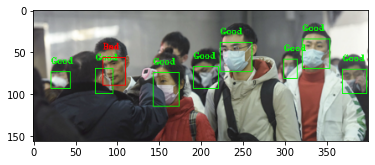

In [79]:
show_bounding_boxes('/Users/gordid/Desktop/MS_AI/Data Mining/Project/Dataset_853/images/maksssksksss1.png')

In [3]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15460, done.
remote: Total 15460 (delta 0), reused 0 (delta 0), pack-reused 15460
Receiving objects: 100% (15460/15460), 14.07 MiB | 13.05 MiB/s, done.
Resolving deltas: 100% (10387/10387), done.


In [5]:
!wget https://pjreddie.com/media/files/darknet53.conv.74 --no-check-certificate

--2022-07-27 12:11:04--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  30.1MB/s    in 5.6s    

2022-07-27 12:11:10 (27.7 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [11]:
!make -f "./darknet/Makefile"

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
chmod: *.sh: No such file or directory
make: *** [setchmod] Error 1


In [26]:
glob.glob('/Users/gordid/Desktop/MS_AI/Data Mining/Project/Worn_Correctly' + '/*.jpg')

['/Users/gordid/Desktop/MS_AI/Data Mining/Project/Worn_Correctly/0015_MRCW_SRGM_0000.jpg',
 '/Users/gordid/Desktop/MS_AI/Data Mining/Project/Worn_Correctly/0001_MRCW_SRGM_0045.jpg',
 '/Users/gordid/Desktop/MS_AI/Data Mining/Project/Worn_Correctly/0034_MRCW_DRNV_0000.jpg',
 '/Users/gordid/Desktop/MS_AI/Data Mining/Project/Worn_Correctly/0001_MRCW_NMDM_0000.jpg',
 '/Users/gordid/Desktop/MS_AI/Data Mining/Project/Worn_Correctly/0001_MRCW_DRWV_0000.jpg',
 '/Users/gordid/Desktop/MS_AI/Data Mining/Project/Worn_Correctly/0008_MRCW_NMDM_0045.jpg',
 '/Users/gordid/Desktop/MS_AI/Data Mining/Project/Worn_Correctly/0005_MRCW_NMDM_0045.jpg',
 '/Users/gordid/Desktop/MS_AI/Data Mining/Project/Worn_Correctly/0005_MRCW_NMDM_0090.jpg',
 '/Users/gordid/Desktop/MS_AI/Data Mining/Project/Worn_Correctly/0008_MRCW_NMDM_0090.jpg',
 '/Users/gordid/Desktop/MS_AI/Data Mining/Project/Worn_Correctly/0038_MRCW_SRGM_0000.jpg',
 '/Users/gordid/Desktop/MS_AI/Data Mining/Project/Worn_Correctly/0004_MRCW_DRNV_0000.jpg',

In [139]:
def copyYOLO(image_folder, text_folder, correct = True):
    
    images = glob.glob(image_folder + '/*.png')
    
    for file in images:
        file = os.path.basename(file)
        file = file.split(".")[0] +'.txt'
        subject = str(int(file[0:4]))
        
        filePath = text_folder + "/Subject " + subject + "/" + file
        with open(filePath, 'r') as reader:
            
            bb = reader.readlines()

            if len(bb) == 1:
                bb = bb[0]
            else:
                bb = bb[2]
            
            if correct:
                bb = "0" + bb[1:]
            else:
                bb = "1" + bb[1:]
            
            with open(image_folder + "/" + file, "w") as writer:
                writer.write(bb)

In [140]:
copyYOLO('/Users/gordid/Desktop/MS_AI/Data Mining/Project/Worn_Correctly',
         '/Users/gordid/Desktop/MS_AI/Data Mining/Project/WWMR-DB - Labels/Labels/YOLO', correct = True)

['0', '0.523438', '0.546007', '0.548032', '0.372396']
(862, 1657, 2756, 3374)


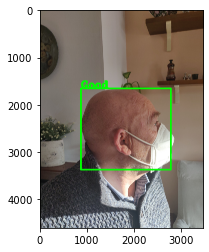

In [142]:
show_bounding_boxes('/Users/gordid/Desktop/MS_AI/Data Mining/Project/Worn_Correctly/0042_MRCW_DRNV_0090.png')

In [143]:
copyYOLO('/Users/gordid/Desktop/MS_AI/Data Mining/Project/Not_Worn',
         '/Users/gordid/Desktop/MS_AI/Data Mining/Project/WWMR-DB - Labels/Labels/YOLO', correct = False)

['1', '0.507345', '0.518904', '0.441495', '0.556327']
(1111, 1247, 2824, 4131)


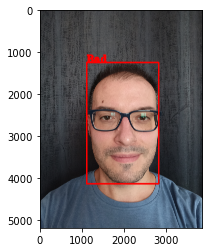

In [145]:
show_bounding_boxes('/Users/gordid/Desktop/MS_AI/Data Mining/Project/Not_Worn/0001_MRNW_0000.png')

In [146]:
copyYOLO('/Users/gordid/Desktop/MS_AI/Data Mining/Project/Worn_Incorrectly',
         '/Users/gordid/Desktop/MS_AI/Data Mining/Project/WWMR-DB - Labels/Labels/YOLO', correct = False)

['1', '0.536856', '0.556906', '0.418041', '0.490741']
(1272, 1615, 2894, 4159)


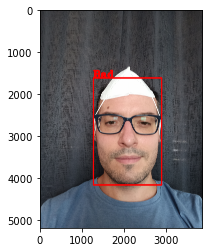

In [147]:
show_bounding_boxes('/Users/gordid/Desktop/MS_AI/Data Mining/Project/Worn_Incorrectly/0001_MRFH_DRNV_0000.png')

In [148]:
source = '/Users/gordid/Desktop/MS_AI/Data Mining/Project/Worn_Incorrectly'
destination = '/Users/gordid/Desktop/MS_AI/Data Mining/Project/All_data2/'
for file in os.listdir(source):
    shutil.copy2(os.path.join(source, file), destination)
    

In [149]:
source = '/Users/gordid/Desktop/MS_AI/Data Mining/Project/Worn_Correctly'
destination = '/Users/gordid/Desktop/MS_AI/Data Mining/Project/All_data2/'
for file in os.listdir(source):
    shutil.copy2(os.path.join(source, file), destination)

In [150]:
source = '/Users/gordid/Desktop/MS_AI/Data Mining/Project/Not_Worn'
destination = '/Users/gordid/Desktop/MS_AI/Data Mining/Project/All_data2/'
for file in os.listdir(source):
    shutil.copy2(os.path.join(source, file), destination)

In [151]:
source = '/Users/gordid/Desktop/MS_AI/Data Mining/Project/Dataset_853/images'
destination = '/Users/gordid/Desktop/MS_AI/Data Mining/Project/All_data2/'
for file in os.listdir(source):
    shutil.copy2(os.path.join(source, file), destination)

## Rearrange Files

In [161]:
files = glob.glob('/Users/gordid/Desktop/MS_AI/Data Mining/Project/All_data2/' + '/*.txt')
destination = '/Users/gordid/Desktop/MS_AI/Data Mining/Project/Data_text'
for file in files:
    shutil.move(file, os.path.join(destination, os.path.basename(file)))

## How many bounding boxes for each class?

In [156]:
files = glob.glob('/Users/gordid/Desktop/MS_AI/Data Mining/Project/All_data2/' + '/*.txt')
bb_classes = []
for file in files:
    with open(file, 'r') as reader:
        bbs = reader.readlines()
        for bb in bbs:
            bb_classes.append(bb[0])


In [157]:
print(bb_classes.count("0"))
print(bb_classes.count("1"))

3384
1650


## Create Test and Training Set

In [162]:
num_images = len(glob.glob('/Users/gordid/Desktop/MS_AI/Data Mining/Project/Data_text/' + '/*.txt'))
num_images

1815

In [166]:
from sklearn.model_selection import train_test_split

In [172]:
from sklearn.model_selection import train_test_split
a = os.listdir('/Users/gordid/Desktop/MS_AI/Data Mining/Project/Data_text/')
tr, te = train_test_split(a, test_size = 0.2)
len(tr)

1452

In [174]:
!pip3 install torchvision

     |████████████████████████████████| 1.3 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 137.5 MB 11.3 MB/s eta 0:00:01    |██████████▎                     | 44.1 MB 11.9 MB/s eta 0:00:08


In [175]:
import torch

In [178]:
os.chdir("/Users/gordid/Desktop/MS_AI/Data Mining/Project/")

In [179]:
!git clone https://github.com/ultralytics/yolov5  # clone

Cloning into 'yolov5'...
remote: Enumerating objects: 12440, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 12440 (delta 21), reused 14 (delta 4), pack-reused 12400
Receiving objects: 100% (12440/12440), 12.42 MiB | 8.26 MiB/s, done.
Resolving deltas: 100% (8520/8520), done.


In [180]:
%cd yolov5

/Users/gordid/Desktop/MS_AI/Data Mining/Project/yolov5


In [181]:
%pip install -qr requirements.txt  # install requirements

Note: you may need to restart the kernel to use updated packages.


In [182]:
from yolov5 import utilsb

In [191]:
!python detect.py --weights last.pt --img 640 --conf 0.5 --source "/Users/gordid/Desktop/Danya_Mask.mov"

detect: weights=['last.pt'], source=/Users/gordid/Desktop/Danya_Mask.mov, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
fatal: cannot change to '/Users/gordid/Desktop/MS_AI/Data': No such file or directory
YOLOv5 🚀 2022-8-3 Python-3.7.7 torch-1.12.0 CPU

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/132) /Users/gordid/Desktop/Danya_Mask.mov: 384x640 1 Correct, Done. (0.097s)
video 1/1 (2/132) /Users/gordid/Desktop/Danya_Mask.mov: 384x640 1 Correct, Done. (0.097s)
video 1/1 (3/132) /Users/gordid/Desktop/Danya_Mask.mov: 384x640 1 Correct, Done. (0.096s)
video 1/1 (4/132) /Users/gordid/Desktop/Danya_Mask.

video 1/1 (83/132) /Users/gordid/Desktop/Danya_Mask.mov: 384x640 1 Incorrect, Done. (0.094s)
video 1/1 (84/132) /Users/gordid/Desktop/Danya_Mask.mov: 384x640 1 Incorrect, Done. (0.086s)
video 1/1 (85/132) /Users/gordid/Desktop/Danya_Mask.mov: 384x640 1 Incorrect, Done. (0.082s)
video 1/1 (86/132) /Users/gordid/Desktop/Danya_Mask.mov: 384x640 1 Incorrect, Done. (0.088s)
video 1/1 (87/132) /Users/gordid/Desktop/Danya_Mask.mov: 384x640 1 Incorrect, Done. (0.084s)
video 1/1 (88/132) /Users/gordid/Desktop/Danya_Mask.mov: 384x640 1 Incorrect, Done. (0.084s)
video 1/1 (89/132) /Users/gordid/Desktop/Danya_Mask.mov: 384x640 1 Incorrect, Done. (0.094s)
video 1/1 (90/132) /Users/gordid/Desktop/Danya_Mask.mov: 384x640 1 Incorrect, Done. (0.092s)
video 1/1 (91/132) /Users/gordid/Desktop/Danya_Mask.mov: 384x640 1 Incorrect, Done. (0.091s)
video 1/1 (92/132) /Users/gordid/Desktop/Danya_Mask.mov: 384x640 1 Incorrect, Done. (0.101s)
video 1/1 (93/132) /Users/gordid/Desktop/Danya_Mask.mov: 384x640 1 Inc